# Ausnahmen (Exceptions)

## Was sind Ausnahmen?

Wir haben schon mehrfach festgestellt, dass beim Ausführen von Programmen Fehler aufgetreten sind, die zum Abbruch des Programms geführt haben. Das passiert beispielsweise, wenn wir auf ein nicht existierendes Element einer Liste zuzugreifen versuchen:

In [ ]:
names = ['Otto', 'Hugo', 'Maria']
names[3]
print('Das steht am Ende des Programms')

Oder wenn wir versuchen eine Zahl durch 0 zu dividieren:

In [ ]:
user_input = 0 
2335 / user_input
print('Das steht am Ende des Programms')

Oder wenn wir versuchen, eine nicht vorhandene Datei zu öffnen:

In [ ]:
with open('hudriwudri.txt') as fh:
    print(fh.read())
print('Das steht am Ende des Programms')    

Da die Ausgabe der `print()`-Funktion (jeweils Zeile 3) nie erfolgt, sehen wir, dass in allen Fällen Python das Programm sofort abbricht, sobald der Fehler auftritt. Das passiert jedoch nur, wenn wir in unserem Programm keinen Mechanismus einbauen, der auf die Ausnahme (d.h. den Fehler) reagiert. Wichtig ist zunächst aber einmal, dass es verschiedene Arten von Ausnahmen gibt. Das ist gut, weil wir dadurch selektiv auf bestimmte Ausnahmen in einer bestimmten Weise reagieren können. Wir werden später sehen, wie das funktioniert. Sehen wir uns aber zuerst ein paar Ausnahme-Typen an.

## Ausnahme-Typen

 Hier noch einmal die drei Fragmente, mit denen wir am Anfang dieses Notebooks Fehler ausgelöst haben:

In [ ]:
names = ['Otto', 'Hugo', 'Maria']
names[3]

In [ ]:
user_input = 0 
2335 / user_input

In [ ]:
with open('hudriwudri.txt') as fh:
    print(fh.read())

Wenn wir genau hinsehen, stellen wir fest, dass es sich um drei unterschiedliche Arten von Fehlern handelt:

* IndexError bei (`names[3]`)
* ZeroDivisionError bei (`2335 / user_input`)
* FileNotFoundError bei (`open('hudriwudri.txt')`)

Python generiert also, abhängig davon, welche Art von Fehler aufgetreten ist, ein entsprechendes Ausnahme-Objekt. 

Diese Fehler sind hierarchisch organisiert, d.h. dass jede zusätzliche Ebene eine speziellere Art eines Fehlers bedeutet. 

Die komplette Hierarchie der eingebauten Exceptions findet sich hier: https://docs.python.org/3/library/exceptions.html#exception-hierarchy. Öffnen Sie diesen Link in einem eigenen Fenster, damit Sie es parallel zum Notebook sehen können!)

Die allgemeinste Art eines Fehlers ist also die `BaseException`. Abgeleitet davon gibt es z.B. die `KeyboardInterrupt`-Exception (wird ausgelöst, wenn der Benutzer das Programm mit 'STRG-C' abbricht) oder die `Exception`, die selbst wieder Basisklasse für viele weitere Exceptions ist, wie etwa des `ArithmethicError` oder des `LookupError`. Der `ArithmeticError` wiederum ist Basisklasse für `FloatingPointError`, `OverflowError` und des gerade aufgetretenen `ZeroDivisionError`.

Dieses Prinzip sollte Ihnen bekannt vorkommen. Es handelt sich dabei im Vererbung im Sinne der Objektorientierung.
Ausgehend von einer Basisklasse `BaseException` wird spezialisiert. D.h. `Exception`ist ein Spezialfall von `BaseException`, `ArithmeticError` wieder ein Spezialfall von `Exception` usw.

Wenn wir uns nur diesen Ausschnitt an Exceptions als Baum aufzeichnen, sieht das so aus:

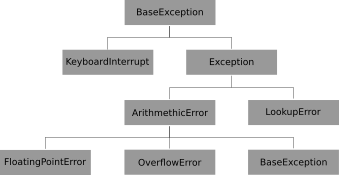

Der Clou an der Sache mit der Vererbung ist, dass die folgenden Aussagen aus der Sicht von Python alle korrekt sind:

* Ein `ZeroDivisionError` ist ein `ZeroDivisionError`
* Ein `ZeroDivisionError` ist ein `ArithmeticError`
* Ein `ZeroDivisionError` ist eine `Exception`
* Ein `ZeroDivisionError` ist eine `BaseException`

Wenn wir also auf einen `ZeroDivisionError` reagieren wollen, können wir genau diesen Exception-Typ abfangen. Alternativ könnten wir alle `ArithmeticError` gemeinsam an einer Stelle behandeln oder sogar alle `Exception`-Objekte, was aber keine gute Idee ist.

## Auf Ausnahmen reagieren

Wenn Python also auf ein Problem stößt, erzeugt es ein Ausnahme-Objekt. Dieses Objekt kann "abgefangen" werden. Sehen wir uns das an einem konkreten Beispiel an:

In [ ]:
divisor = int(input('Divisor: '))
try:
    print(6543 / divisor)
except:
    print('Bei der Division ist ein Fehler aufgetreten')
print("Programm wird normal beendet.")   

Wir haben hier den "gefährlichen" Codeteil (also den Teil, wo eine Division durch 0 passieren könnte) in einen "`try`"-Block gesetzt. Wenn innerhalb des `try`-Blocks ein Fehler auftritt, wird der "`catch`" Block aktiviert und dort (in unserem trivialen Beispiel) die entsprechende Fehlermeldung ausgegeben. Wesentlich dabei ist aber, dass -- anders als bisher -- beim Auftreten der Ausnahme das Programm nicht mehr abgebrochen wird, was wir daran erkennen können, das die `print()`-Funktion in Zeile 6 ausgeführt wird. Wie haben die Ausnahme selbst behandelt und Python sieht deshalb keine Veranlassung mehr, das Programm wegen des Fehlers zu beenden.

Was wir hier gemacht haben, ist jedoch **ganz schlechter Stil**: Wir haben jede Art von Fehler oder Warnung abgefangen. Damit werden unter Umständen auch Fehler abgefangen, die wir gar nicht abfangen wollten, und die unter Umständen entscheidende Hinweise zur Fehlersuche geben könnten. Hier ein (sehr konstruiertes) Beispiel um das zu verdeutlichen. Geben Sie zuerst `0` ein, um einen `ZeroDivisionError` auszulösen:

In [ ]:
divisor = int(input('Divisor: '))
some_names = ['Otto', 'Anna']
try:
    print(some_names[divisor])
    print(6543 / divisor)
except:
    print('Bei der Division ist ein Fehler aufgetreten')
print("Programm wird normal beendet.")       

Das ist das, was wir schon kennen und auch erwartet haben.

Lassen Sie nun die Zelle oben noch einmal laufen und geben Sie `5` ein! Python meldet erneut, dass es ein Problem beim Dividieren gegeben hat. In Wahrheit war mit der Division alles in Ordnung; das Problem war, dass wir in Zeile 4 auf Index `5` einer Liste mit nur zwei Elementen zugegriffen haben. Wir haben es hier also nicht mehr mit einem `ZeroDivisionError` zu tun, sondern mit einem `IndexError`. Da wir aber alle Exceptions in unserem `catch` abfangen, bekommen wir die echte Fehlermedlung nie zu Gesicht und entsprechend schwierig wird sich die Fehlersuche gestalten.

Das ist der Grund, warum ein

```python
catch:
```

nie in dieser allgemeinsten Form verwendet werden soll. Geben Sie statt dessen den Typ der Exception, auf die reagiert werden soll, möglichst genau an (Zeile 6):

In [ ]:
divisor = int(input('Divisor: '))
some_names = ['Otto', 'Anna']
try:
    print(some_names[divisor])
    print(6543 / divisor)
except ZeroDivisionError:
    print('Bei der Division ist ein Fehler aufgetreten')
print("Programm wird normal beendet.")       

So wie das `catch` nun geschrieben ist, fühlt es sich nur noch für Ausnahmen vom Typ `ZeroDivisionError` zuständig. Probieren Sie es aus, indem Sie zuerst wieder `0` eingeben und dann `5`. Bei `5` sehen Sie nun wieder den `IndexError` und Sie haben eine Chance, herauszufinden, was falsch gelaufen ist.

### Auf mehrere Exceptions reagieren

Im letzten Beispiel haben wir je nach Eingabe einen `ZeroDivisionError` oder einen `IndexError`  ausgelöst. Abgefangen wurde aber nur der `ZeroDivisionError`. Wenn wir auch auf den `IndexError` selbst reagieren wollen, können wir ein weiteres `catch` einbauen:

In [ ]:
divisor = int(input('Divisor: '))
some_names = ['Otto', 'Anna']
try:
    print(some_names[divisor])
    print(6543 / divisor)
except ZeroDivisionError:
    print('Bei der Division ist ein Fehler aufgetreten')
except IndexError:
    print('Die Liste hat nicht so viele Elemente!')
print("Programm wird normal beendet.")   

Die Kunst beim Exception Handling ist herauszufinden
* wann es überhaupt Sinn macht, eine Exception abzufangen.
  * Wenn ein Fehler so gravierend ist, dass die weitere Programmausführung keinen Sinn macht, macht es in der Regel auch keinen Sinn, die Exception abzufangen (außer Sie wollen z.B. eine benutzerfreundllicher Fehlermeldung ausgeben und dann das Programm selbst beenden).
  * Wenn das Problem keine gravierenden Auswirkungen hat, könnte man im `catch` Block beispielsweise eine Warnung ausgeben und dann das Programm weiter laufen lassen.
  * Manchmal möchte man das Programm sogar bei schweren Fehlern weiter laufen lassen. Beispielsweise sollte ein Webserver nicht durch eine fehlerhafte Anfrage beendet werden. In so einem Fall fängt man die Exception ab und sendet eine entsprechende Anfrage an den Client zurück und nimmt dann die nächste Anfage entgegen.
  * Wenn ein Fehler durch eine unmittelbare Benutzereingabe auftritt, kann man u.U. im `catch` Block die Eingabe erneut einfordern (hier ist es aber normalerweise besser, die Eingabe explizit zu validieren).
  * Manchmal kann es Sinn machen, das Programm quasi zu resetten, also z.B. einen Defaultwert zu verwenden. Das muss aber gut bedacht werden.
* An welcher Stelle die Ausnahme behandelt werden soll
  * Wir wir noch sehen werden, muss die Exception nicht zwingend dort abgefangen werden, wo sie auftritt.

Ehe wir weiter machen, noch ein Beispiel, bei dem das Exception Handling vielleicht mehr Sinn macht:

In [ ]:

def ask_for_number():
    """Ask for number.
    
    Ask again if user did enter a non number until he enters a number.
    """
    while True:
        try: 
            num = int(input('Geben Sie eine Zahl ein: '))
            break
        except ValueError:
            print('Das war keine Zahl!')
    return num
    
print(f'User hat {ask_for_number()} eingegeben.')
    

Der Trick sind hier die beiden Zeile im ``try``-Block: Wir versuchen zuerst, den eingegeben String in einen Integer umzuwandeln. Wenn das funktioniert, wird die nächste Zeile (``break``) ausgeführt und somit die Schleife beendet. Der umgewandelte Wert wird zurückgeliefert. Wenn aber beim Umwandeln etwas schief geht, wirft Python einen `ValueError`, den wir mit ``catch`` abfangen und eine entsprechende Meldung ausgeben. Da im ``catch``-Block kein ``break`` steht, und das ``break`` im ``try``-Block wegen der Exception nicht erreicht wird, wird der Benutzer imm nächsten Scheifendurchlauf erneut gefragt.

### Die Typ-Hierarchie nutzen

Holen wir uns noch einmal das vorletzte Beispiel in etwas vereinfachter Form:

In [ ]:
divisor = int(input('Divisor: '))
try:
    print(6543 / divisor)
except ZeroDivisionError:
    print('Bei der Division ist ein Fehler aufgetreten')
print("Programm wird normal beendet.")       

Hier haben wir auf einen einen `catch`-Block für den `ZeroDivisionError` definiert. Wir reagieren als ausschließlich auf Exception dieses Typs. 

Alternativ hätten wir auch höher in der Exception-Hierarchie einsteigen können: Wenn wir nicht nur den `ZeroDivisionError`, sondern alle `ArithmeticError`-Ausnahmen abfangen, ist damit auch der `ZeroDivisionError` abgedeckt. 

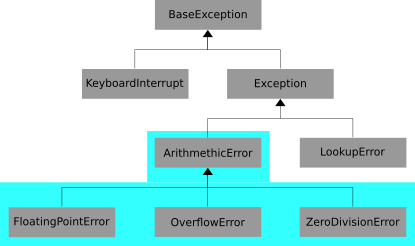

Geben Sie beim Ausführen der folgenden Code-Zelle `0` ein:

In [ ]:
divisor = int(input('Divisor: '))
try:
    print(6543 / divisor)
except ArithmeticError:
    print('Es ist ein Rechenfehler aufgetreten!')
print("Programm wird normal beendet.")       

Das funktioniert, weil der `ZeroDivisionError` ein Spezialfall des `ArithmeticError` ist.

Im Prinzip würde auch das funktionieren:

In [ ]:
divisor = int(input('Divisor: '))

try:
    print(6543 / divisor)
except Exception:
    print('Es ist ein Fehler aufgetreten!')
print("Programm wird normal beendet.")       

Allerdings haben wir hier wieder ein ähnliches Problem wie ganz zu Beginn, als wir beim `catch` keine Exception-Typ spezifiziert  haben: Wenn wir `Exception` abfangen,  reagieren wir auf den Großteil der Python-Fehlertypen und machen uns dadurch das Leben bei der Fehlersuche unnnötig schwer.

Wenn wir hingegen eine Nicht-Zahl (z.B. 'abc') eingeben, wird das Programm nach wie vor abgebrochen, weil die Umwandlung nach int außerhalb des ``try``-Blocks steht.

<div class="alert alert-block alert-info">
<b>Übung Exception-1</b>
<p>Lassen sie die unmittelbar folgende Code-Zelle laufen und geben Sie statt einer Zahl den String 'abc' ein. Das Programm wird mit einer Fehlermeldung abgebrochen. Schreiben Sie den Code so um, dass auch dieser Fehler sauber im Programm behandelt und das Programm somit sauber beendet wird.</p>
</div>

In [ ]:
divisor = int(input('Geben Sie einen Divisor ein: '))
try:
    result = 8374949 / divisor
    print('Ergebnis: {result}')
except (ZeroDivisionError):
    print('Bei der Division ist ein Fehler aufgetreten.')
print("Programm wird normal beendet.")

### finally

Falls wir ein Code-Fragment in jedem Fall ausführen wollen, also unabhängig davon, ob ein Fehler aufgetreten ist oder nicht, können wir einen `finally`-Block definieren. Da macht zum Beispiel Sinn, wenn wir irgendwelche Ressourcen wie Filehandles freigeben wollen.

~~~
try:
    f = open('data.txt')
    # make some computations on data
except ZeroDivisionError:
    print('Warning: Division by Zero in data.txt')
finally:
    f.close()
    
~~~

## Exceptions wandern durch den Stack

Ein großer Vorteil von Exceptions ist, dass wir sie nicht zwingend dort abfangen müssen, wo sie auftreten, weil sie durch die Aufrufhierarchie durchgereicht werden, bis sie irgendwo behandelt werden (oder auch nicht, was dann zum Programmabbruch führt). Zur Illustration schreiben wir eine Funktion, das den Benutzer nach einer Zahl fragt. Hier müssen wir berücksichtigen, dass der Benutzer etwas eingeben könnte, das nicht als Zahl interpretierbar ist. In diesem Fall würde bei Aufruf der Funktion `int()` (Zeile 3) ein `ValueError` ausgelöst:

In [ ]:
def ask_for_int(msg):
    try:
        return int(input('{msg}: '))
    except ValueError:
        print('Das war keine Zahl!')
        return ask_for_int(msg) # Run function again


print(6543 / ask_for_int('Divisor eingeben'))

Wir haben die Exception an Ort und Stelle (nämlich in der Funktion abgefangen). Nur nebenbei: im  `catch`-Block rufen wir aus der Funktion heraus, die Funktion so lange erneut auf, bis eine brauchbare Eingabe erfolgt. Man nennt dies Rekursion.

Da Exceptions aber durch den Stack gereicht werden, könnten wir die Exception auch außerhalb der Funktion (z.B. an einer zentralen Stelle im Programm) abfangen. Hier ein entsprechendes Beispiel:

In [ ]:
def ask_for_int(msg):
    return int(input('{msg}: '))

try:
    print(6543 / ask_for_int('Divisor eingeben'))
except ValueError:
    print('Das war keine Zahl!')

Kleiner Exkurs: Falls Sie hier eine erneute Ausgabe haben möchten (wie im anderen Beispiel) können Sie das mit einer `while`-Schleife lösen:

In [ ]:
def ask_for_int(msg):
    return int(input('{msg}: '))

while True:
    try:
        print(6543 / ask_for_int('Divisor eingeben'))
        break
    except ValueError:
        print('Das war keine Zahl!')

## Zugriff auf Ausnahme-Objekte
Wenn eine Ausnahme auftritt, erzeugt Python ein Ausnahmeobjekt, das, wie wir gesehen haben, durchgereicht wird. Falls benötigt, können wir dieses Objekt im `catch`-Block sogar genauer untersuchen oder weiterverwenden.

In [ ]:
def ask_for_int(msg):
    return int(input('{msg}: '))

try:
    print(6543 / ask_for_int('Divisor eingeben'))
except ValueError as exp:
    print('Ich kann nur durch eine Zahl dividieren!')
    print(f'Das Problem war: {exp.args}')

Via `as` haben wir das Exception-Objekt in einer Variable `exp` zugewiesen und  verwenden diese in Zeile 8, um daraus die originale Fehlermeldung zu extrahieren und auszugeben.

## Ausnahmen auslösen
Bei Bedarf können wir sogar selbst Ausnahmen auslösen.

In [ ]:
def ask_for_int(msg):
    return int(input('{msg}: '))

try:
    print(6543 / ask_for_int('Bitte Zahl eingeben: '))
except ValueError as exp:
    print('Da ist ein Fehler aufgetreten: Ungültige Eingabe')
    raise exp

Hier haben wir wie zuvor das Exception-Objekt in eine Variable gespeichert. Im `catch`-Block haben wir zunächst eine Meldung ausgegeben und dann den originalen Fehler erneut ausgelöst. Das kann sinnvoll sein, wenn wir an Ort und Stelle etwas tun müssen, das eigentliche Exception-Handling aber an anderer Stelle statt findet.

Häufiger braucht man aber erfahrungsgemäß die Möglichkeit, selbst eine Exception auszulösen:

In [ ]:
def ask_for_int(msg):
    return int(input('{msg}: '))

grade = ask_for_int('Note eingeben: ')
if grade < 1 or grade > 5:
    raise ValueError("Input must be 1, 2, 3, 4 or 5!")

## Eigene Ausnahmen definieren

Bei größeren Projekten ist es manchmal nützlich, eigene Ausnahmen oder sogar ganze Ausnahmehierarchien zu definieren um gezielt auf solche Ausnahmen reagieren zu können. 

In [ ]:
class MyAppException(Exception): pass
class MyAppWarning(MyAppException): pass
class MyAppError(MyAppException): pass
class GradeValueException(MyAppError): pass

Damit haben wir unsere eigene Ausnahmehierarchie definiert:

~~~
Exception
|---- MyAppException
      | ---- MyAppWarning
      | ---- MyAppError
             | ---- GradeValueException
~~~

Je nach Bedarf können wir hier nun z.B. auf alle Subtypen von `MyAppException` reagieren oder auf alle `MyAppWarnings` oder `MyAppErrors` oder ganz gezielt auf eine `GradeValueException`.

## Vertiefende Literatur
Ich empfehle ausdrücklich, mindestens eine der folgenden Ressourcen zur Vertiefung zu lesen!

  * Python Tutorial: 
	* Kapitel 8
		* http://docs.python.org/3/tutorial/errors.html
  * Klein, Kurs: 
     (https://www.diveinto.org/python3/your-first-python-program.html#exceptions)
  
  
  * Klein, Buch: Kapitel 18.
  * Kofler: Kapitel 10.
  * Inden: Kapitel 9.
  * Weigend: Kapitel 5.7 und S. 567 f.
  * Pilgrim: Kapitel 1.7:
    (https://www.diveinto.org/python3/your-first-python-program.html#exceptions)

## Lizenz

This notebook ist part of the course [Grundlagen der Programmierung](https://github.com/gvasold/gdp) held by [Gunter Vasold](https://online.uni-graz.at/kfu_online/wbForschungsportal.cbShowPortal?pPersonNr=51488) at Graz University 2017&thinsp;ff. 

<p>
    It is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0">CC BY-NC-SA 4.0</a>
</p>

<table>
    <tr>
    <td>
        <img style="height:22px" 
             src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"/></li>
    </td>
    <td>
    <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
             src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" /></li>
    </td>
</tr>
</table>